# PyTorch Fundamentals

In this notebook, I review basic tensor operations in PyTorch and building neural networks, mostly following Chapters 12 and 13 of <i>''Machine Learning with PyTorch and Scikit-Learn''</i> by Sebastian Raschka et al. This notebook covers:

1. Creating tensors in PyTorch
2. Manipulating data type and shape of tensor
3. Operations on tensors
4. Building input pipelines
5. Simple linear regression model in PyTorch
6. XOR classification with nn.Sequential
7. XOR classification with nn.Module

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

## 1. Creating tensors in PyTorch

Creating a tensor from a list or numpy array:

In [2]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)      # tensor from list
t_b = torch.from_numpy(b)  # tensor from numpy array

t_ones = torch.ones(2, 3)       # tensor of ones
rand_tensor = torch.rand(2, 3)  # tensor of random values

In [3]:
print(t_a)
print(t_b)
print(t_ones)
print(rand_tensor)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.7794, 0.1164, 0.3139],
        [0.3971, 0.2793, 0.7157]])


## 2. Manipulating data type and shape of tensor

##### Change data type:

In [4]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


##### Transposing a tensor:

In [5]:
t = torch.rand(3, 5)
print(t)
print(t.shape)

tensor([[0.1257, 0.9263, 0.1381, 0.8227, 0.7799],
        [0.8724, 0.3193, 0.8371, 0.5845, 0.2296],
        [0.1639, 0.9779, 0.6398, 0.3206, 0.7073]])
torch.Size([3, 5])


In [6]:
t_tr = torch.transpose(t, 0, 1)  # i.e. swapping dimensions 0 and 1
print(t_tr)
print(t_tr.shape)

tensor([[0.1257, 0.8724, 0.1639],
        [0.9263, 0.3193, 0.9779],
        [0.1381, 0.8371, 0.6398],
        [0.8227, 0.5845, 0.3206],
        [0.7799, 0.2296, 0.7073]])
torch.Size([5, 3])


##### Reshaping a tensor:

In [7]:
t = torch.zeros(30)
print(t)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])


In [8]:
t_reshape = t.reshape(5, 6)
print(t_reshape)
print(t_reshape.shape)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
torch.Size([5, 6])


##### Removing unnecessary dimensions:

In [9]:
t = torch.zeros(1, 2, 1, 5, 1)
print(t)
print(t.shape)

tensor([[[[[0.],
           [0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.],
           [0.]]]]])
torch.Size([1, 2, 1, 5, 1])


In [10]:
t_sqz = torch.squeeze(t)
print(t_sqz)
print(t_sqz.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


## 3. Operations on tensors

##### Instantiating random tensors

In [11]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5,2))  # Normally distributed random numbers

In [12]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [13]:
t2

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

##### Element-wise product

In [14]:
t3 = torch.multiply(t1, t2) 
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

##### Mean, sum, standard deviation

In [15]:
print(torch.mean(t1)) # Mean of all elements

tensor(0.0327)


In [16]:
print(torch.mean(t1, axis=0))  # Mean of each column (i.e. averaging over row dimension 0)

tensor([-0.1373,  0.2028])


In [17]:
print(torch.mean(t1, axis=1))   # Mean of each row (i.e. averaging over column dimension 1)

tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [18]:
print(torch.sum(t1)) # Sum of all elements

tensor(0.3273)


In [19]:
print(torch.sum(t1, axis=0)) # Sum of each column (i.e. sum over each row dimension 0)

tensor([-0.6867,  1.0140])


In [20]:
print(torch.sum(t1, axis=1)) # Sum of each row (i.e. sum over each column dimension 1)

tensor([ 0.0739,  0.2755, -0.3417,  0.3030,  0.0166])


In [21]:
print(torch.std(t1, axis=0))

tensor([0.5378, 0.4591])


##### Matrix multiplication and norm

In [22]:
print(t1)
print(t1.shape)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
torch.Size([5, 2])


In [23]:
print(t2)
print(t2.shape)

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])
torch.Size([5, 2])


Can calculate product of matrices: $t_1 \times t_2^T$, which will be a $5 \times 5$ matrix:

In [24]:
t3 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t3)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


Can calculate product of matrices: $t_1^T \times t_2$, which will be a $2 \times 2$ matrix:

In [25]:
t4 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t4)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [26]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)   # t1 is (5, 2) tensor. To calc norm of each row, sum of squares of elements in column direction (dim=1).
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [27]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1)) # Check that normalized tensor above matches numpy result

array([0.67846215, 0.5078282 , 1.1162277 , 0.5487652 , 0.18525197],
      dtype=float32)

##### Split, stack, concatenate tensors

In [28]:
t = torch.rand(6)    
print(t)
t_splits = torch.chunk(t, 3)   # Split tensor t (with 6 elements) into m chunks with torch.chunk(t, m)
print(t_splits)

tensor([0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588])
(tensor([0.6397, 0.9743]), tensor([0.8300, 0.0444]), tensor([0.0246, 0.2588]))


In [29]:
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])   # Can instead specify size of each split with torch.split()
print(t_splits)

tensor([0.9391, 0.4167, 0.7140, 0.2676, 0.9906])
(tensor([0.9391, 0.4167, 0.7140]), tensor([0.2676, 0.9906]))


In [30]:
A = torch.ones(3)
print(A)

B = torch.zeros(2)
print(B)

tensor([1., 1., 1.])
tensor([0., 0.])


In [31]:
C = torch.cat([A, B], axis=0)  # Concatenate row-wise
print(C)

tensor([1., 1., 1., 0., 0.])


In [32]:
D = torch.ones(3)
print(D)

E = torch.zeros(3)
print(E)

tensor([1., 1., 1.])
tensor([0., 0., 0.])


In [33]:
F = torch.stack([D, E], axis=1)    # Concatenate tensors (D and E, both 1-dimensional) along a new dimension (column direction, dim=1)
print(F)                           # Now form a 2-dimensional tensor F

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## 4. Building input pipelines

##### Creating a DataLoader from tensor

In [34]:
from torch.utils.data import DataLoader

In [35]:
t = torch.arange(6, dtype=torch.float32)
print(t)

tensor([0., 1., 2., 3., 4., 5.])


Our data is in the form of a tensor t. We can now create a dataset loader, which we use to iterate through each element of the dataset.

Below, data_loader is an object of the DataLoader class.

In [36]:
data_loader = DataLoader(t)
data_loader

In [37]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


We can specify the batch_size argument, which will give us batches of a desired size as we iterate:

In [38]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for item in data_loader:
    print(item)

tensor([0., 1., 2.])
tensor([3., 4., 5.])


##### Combining two tensors into joint dataset

In [39]:
t_x = torch.rand([4, 3], dtype=torch.float32)    # Input data: 4 samples, each with 3 features. X is (4, 3) tensor.
t_y = torch.arange(4)   # Labels, i.e. Y (has 4 elements only)

print(t_x)
print(t_y)

tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193],
        [0.2616, 0.7713, 0.3785],
        [0.9980, 0.9008, 0.4766]])
tensor([0, 1, 2, 3])


In [40]:
from torch.utils.data import Dataset

In [41]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [42]:
joint_dataset = JointDataset(t_x, t_y)

In [43]:
for sample in joint_dataset:
    print(sample)

(tensor([0.7570, 0.2346, 0.6471]), tensor(0))
(tensor([0.3556, 0.4452, 0.0193]), tensor(1))
(tensor([0.2616, 0.7713, 0.3785]), tensor(2))
(tensor([0.9980, 0.9008, 0.4766]), tensor(3))


We can also simply use the TensorDataset class to create our joint dataset:

In [44]:
from torch.utils.data import TensorDataset

joint_dataset = TensorDataset(t_x, t_y)   

for sample in joint_dataset:
    print(sample)

(tensor([0.7570, 0.2346, 0.6471]), tensor(0))
(tensor([0.3556, 0.4452, 0.0193]), tensor(1))
(tensor([0.2616, 0.7713, 0.3785]), tensor(2))
(tensor([0.9980, 0.9008, 0.4766]), tensor(3))


##### Shuffle, batch, and repeat

In [45]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)   # Create data loader from our dataset

In [46]:
for batch in data_loader:   # Batches (of size 2) returned in shuffled order, keeping correspondence between x and y.
    print(batch)

[tensor([[0.9980, 0.9008, 0.4766],
        [0.3556, 0.4452, 0.0193]]), tensor([3, 1])]
[tensor([[0.2616, 0.7713, 0.3785],
        [0.7570, 0.2346, 0.6471]]), tensor([2, 0])]


We can pass through the full dataset in batches, for multiple epochs:

In [47]:
for epoch in range(2):
    
    print(f'epoch {epoch+1}: \n')
    
    for i, batch in enumerate(data_loader, 1):
        print(f'    batch {i}:  x: {batch[0]} \n     y: {batch[1]} \n')
        
    print('\n')

epoch 1: 

    batch 1:  x: tensor([[0.9980, 0.9008, 0.4766],
        [0.2616, 0.7713, 0.3785]]) 
     y: tensor([3, 2]) 

    batch 2:  x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
     y: tensor([0, 1]) 



epoch 2: 

    batch 1:  x: tensor([[0.2616, 0.7713, 0.3785],
        [0.9980, 0.9008, 0.4766]]) 
     y: tensor([2, 3]) 

    batch 2:  x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
     y: tensor([0, 1]) 





##### Fetching datasets from torchvision.datasets

In [48]:
image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw


100.0%


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw




100.0%
100.0%

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [49]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x1254F42F130>, 5)


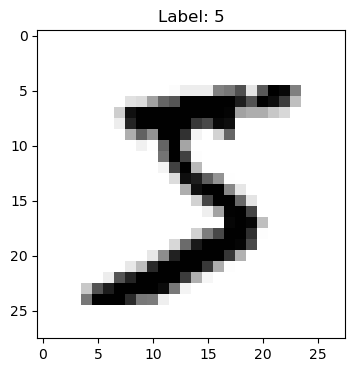

In [50]:
plt.figure(figsize=(4,4))
plt.imshow(example[0], cmap='binary')
plt.title(f'Label: {example[1]}')
plt.show()

## 5. Simple linear regression model with PyTorch

##### X and y data:

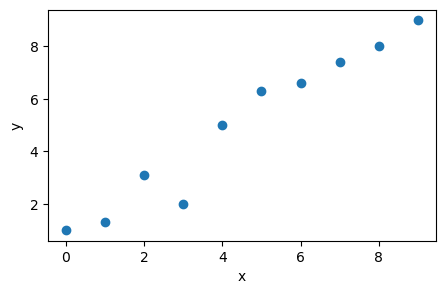

In [51]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')
plt.figure(figsize=(5,3))
plt.plot(X_train, y_train, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Standardize data and create a Dataset and DataLoader:

In [52]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [53]:
next(iter(train_dl))

[tensor([[-0.5222]]), tensor([2.])]

##### Linear regression without torch.nn

Model: $z = wx + b$. First, let's define our model from scratch without using torch.nn. 

In [54]:
def model(xb):
    return xb @ weight + bias

In [55]:
def loss_fn(inpt, target):
    return (inpt - target).pow(2).mean()   # mean squared error

In [56]:
torch.manual_seed(1)
weight = torch.randn(1)  # Initialized weight and bias
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

learning_rate = 0.001
num_epochs = 200

for epoch in range(num_epochs):
    
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        
    with torch.no_grad():   # Disable gradient calculation, since we do not need this for below update
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        
    weight.grad.zero_()    # Set grads to zero so they are not accumulated in subsequent backward passes 
    bias.grad.zero_()
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')
        

Epoch 0  Loss 46.5720
Epoch 10  Loss 27.1502
Epoch 20  Loss 1.6446
Epoch 30  Loss 14.4571
Epoch 40  Loss 11.7827
Epoch 50  Loss 6.4122
Epoch 60  Loss 0.6339
Epoch 70  Loss 3.1562
Epoch 80  Loss 2.0100
Epoch 90  Loss 0.3107
Epoch 100  Loss 0.7625
Epoch 110  Loss 1.0024
Epoch 120  Loss 0.0232
Epoch 130  Loss 0.5138
Epoch 140  Loss 0.0741
Epoch 150  Loss 1.8712
Epoch 160  Loss 0.0007
Epoch 170  Loss 0.0850
Epoch 180  Loss 0.0634
Epoch 190  Loss 0.0012


In [58]:
print(f'Weight: {weight.item()}')

Weight: 2.670930862426758


In [59]:
print(f'Bias: {bias.item()}')

Bias: 4.88258695602417


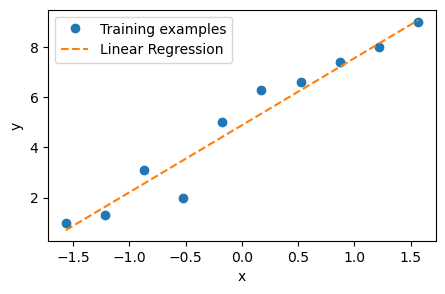

In [64]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
plt.figure(figsize=(5,3))
plt.plot(X_train_norm, y_train, 'o', label='Training examples')
plt.plot(X_test_norm, y_pred, '--', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

##### Linear Regression with torch.nn and torch.optim

In [65]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model2 = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [72]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        
        pred = model2(x_batch)[:, 0]    # [:, 0] so prediction has shape [1], not [1, 1], so it matches y_batch shape.
        
        loss = loss_fn(pred, y_batch)    # calc loss
        
        loss.backward()    # compute gradients
        
        optimizer.step()   # update parameters
         
        optimizer.zero_grad()    # reset grads to zero
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 2.4346
Epoch 10  Loss 0.1395
Epoch 20  Loss 0.0743
Epoch 30  Loss 0.0055
Epoch 40  Loss 0.2379
Epoch 50  Loss 0.7407
Epoch 60  Loss 0.0742
Epoch 70  Loss 0.0471
Epoch 80  Loss 0.1395
Epoch 90  Loss 0.2523
Epoch 100  Loss 0.0055
Epoch 110  Loss 0.2379
Epoch 120  Loss 0.0055
Epoch 130  Loss 0.0471
Epoch 140  Loss 0.1395
Epoch 150  Loss 0.0743
Epoch 160  Loss 0.7408
Epoch 170  Loss 0.2379
Epoch 180  Loss 0.7408
Epoch 190  Loss 0.2522


In [73]:
print(f'Weight: {model2.weight.item()}')

Weight: 2.7066938877105713


In [74]:
print(f'Bias: {model2.bias.item()}')

Bias: 4.969970703125


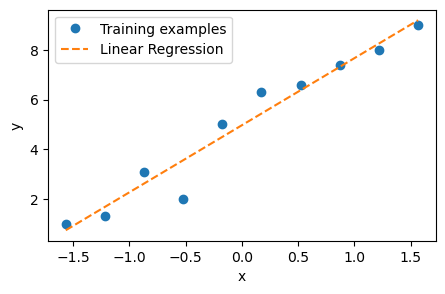

In [75]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model2(X_test_norm).detach().numpy()
plt.figure(figsize=(5,3))
plt.plot(X_train_norm, y_train, 'o', label='Training examples')
plt.plot(X_test_norm, y_pred, '--', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 6. XOR classification with nn.Sequential

Building a simple neural network with nn.Sequential. Let's generate $(x_0, x_1)$ pairs drawn from a uniform distribution between $[-1, 1)$, and assign each a label: $y=0$ if $x_0 \times x_1 < 0$, or $y=1$ otherwise.

In [76]:
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(-1, 1, size=(200, 2))      # 200 samples
y = np.array(x[:, 0] * x[:, 1] >= 0, dtype=int)

# Split into 100 training samples, 100 validation

n_train = 100

x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

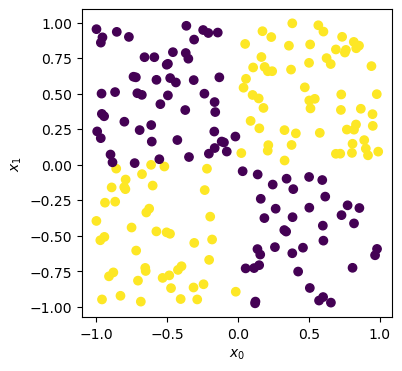

In [77]:
plt.figure(figsize=(4,4))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.show()

##### Try single-layer logistic regression with nn.Sequential

In [78]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [79]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [80]:
loss_fn = nn.BCELoss()   # Using cross entropy as loss function for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [81]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [82]:
torch.manual_seed(1)
num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
                        
            loss_hist_train[epoch] += loss.item()
            
            is_correct = ((pred >= 0.5).float() == y_batch).float()   # 1 if pred = y_batch, 0 otherwise
            
            accuracy_hist_train[epoch] += is_correct.mean()        # Mean accuracy for this batch
            
        loss_hist_train[epoch] /= (n_train / batch_size)           # BCEloss by default calculates mean loss for minibatch (i.e. mean of 2 samples), which we accumulated for 50 batches.
                                                                   # So to get mean loss per sample, now divide by (n_train / batch_size)
                                                                      
        accuracy_hist_train[epoch] /= (n_train / batch_size)       # e.g. divide by 100/2 = 50, since we accumulated 50 mean accuracies for each minibatch
        
        # Get validation accuracy and loss:
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float() 
        accuracy_hist_valid[epoch] += is_correct.mean()
        
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [83]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

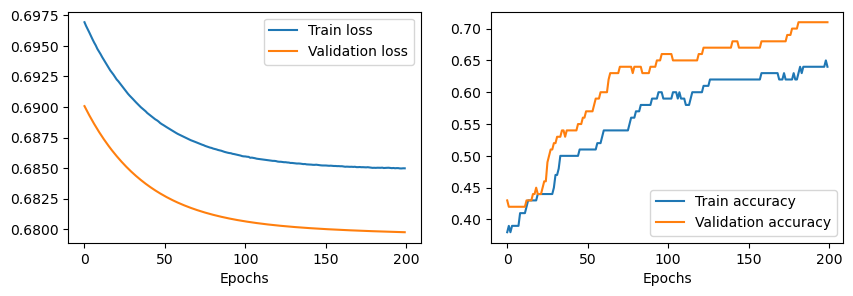

In [84]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], label='Train loss')
plt.plot(history[1], label='Validation loss')
ax.set_xlabel('Epochs')
plt.legend()
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], label='Train accuracy')
plt.plot(history[3], label='Validation accuracy')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

Poor peformance as expected: a simple model with no hidden layer can only produce a linear decision boundary. Try adding 2 hidden layers:

In [85]:
model_2 = nn.Sequential(

    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()

)

In [86]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.015)

In [87]:
history_2 = train(model_2, num_epochs, train_dl, x_valid, y_valid)

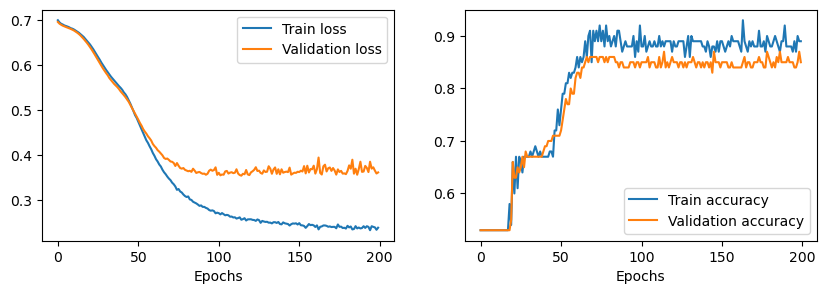

In [88]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_2[0], label='Train loss')
plt.plot(history_2[1], label='Validation loss')
ax.set_xlabel('Epochs')
plt.legend()
ax = fig.add_subplot(1, 2, 2)
plt.plot(history_2[2], label='Train accuracy')
plt.plot(history_2[3], label='Validation accuracy')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

## 7. XOR classification with nn.module

Instead of using nn.Sequential, we can create a new class derived from nn.Module, where we now define the layers as attributes of the class, and define a forward() method:

In [89]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()

In [90]:
model_3 = MyModule()
model_3

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [91]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.015)
history_3 = train(model_3, num_epochs, train_dl, x_valid, y_valid)

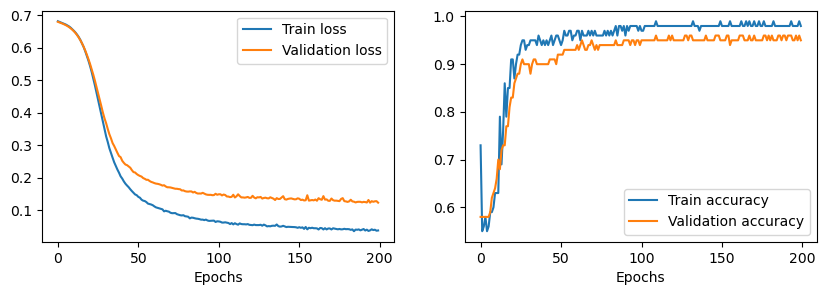

In [92]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_3[0], label='Train loss')
plt.plot(history_3[1], label='Validation loss')
ax.set_xlabel('Epochs')
plt.legend()
ax = fig.add_subplot(1, 2, 2)
plt.plot(history_3[2], label='Train accuracy')
plt.plot(history_3[3], label='Validation accuracy')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

##### Plot decision boundary for network with 2 hidden layers:

In [93]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

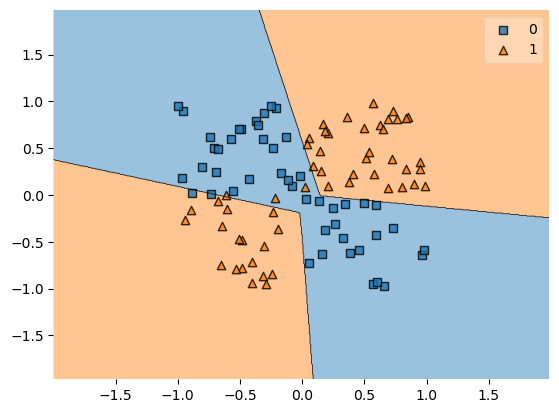

In [94]:
plot_decision_regions(X=x_valid.numpy(), y=y_valid.numpy().astype(np.int_), clf=model_3)